In [16]:
import pyshtools
import numpy as np
import matplotlib.pyplot as plt


/opt/anaconda3/envs/pygmt/lib/python3.8/site-packages/pyshtools/shclasses/shmagcoeffs.py:2178: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


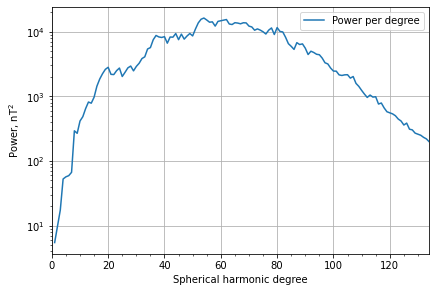

In [8]:
# Load the coefficients into an array
coeffs_array, lmax = pyshtools.shio.shread('./shc/Langlais++_Mars.cof')

# derive a SHMagCoeffs class object
coeffs = pyshtools.SHMagCoeffs.from_array(coeffs_array, r0=3389500.)

# Make the plot
clmm.plot_spectrum()
plt.show()


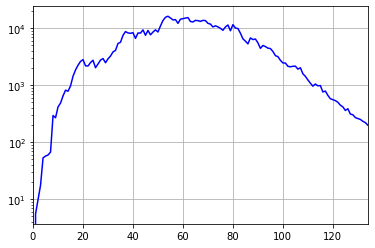

In [23]:
# Method number 2
# This does the same thing, but would allow you to add multiple spectra in the same plot

power = clmm.spectrum(unit='per_l')

plt.semilogy(np.arange(0,lmax+1), power, color='b')
plt.xlim(0,lmax)
plt.grid()
plt.show()